**KMENSAH_ASSIGNMENT3**

Question 2.

Use hierarchical clustering, visualize the tree and determine the best “cut”. What distance measure did you use? Why? Compare the branching order to the CART from module 2.

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

from sklearn.preprocessing import LabelEncoder

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

# To tune different models
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # Import for feature standardization
from sklearn.decomposition import PCA # Import for PCA generation
from sklearn.model_selection import train_test_split,  RandomizedSearchCV # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
from scipy.stats import randint # Generate random numbers

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

In [ ]:
#pip install scikit-plot

In [ ]:
import matplotlib.gridspec as gridspec
import warnings
warnings.simplefilter('ignore', UserWarning)

import gc
gc.enable()

Read the dataset


In [ ]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data1=pd.read_csv('/content/drive/MyDrive/application_train.csv')

In [ ]:
# copying data to another varaible to avoid any changes to original data
app_train3 = data1.copy()


In [ ]:
app_train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
app_train3.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
app_train3['TARGET'].isnull().values.any()

False

Cleaning The Data

Drop NAME_CONTRACT_TYPE

In [ ]:
app_train1=app_train3.drop(['NAME_CONTRACT_TYPE'], axis=1)

In [ ]:
app_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(15)
memory usage: 283.9+ MB


In [ ]:
app_train1.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        #Column names
#         Columns = pd.Series(df_train.columns)
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1,ignore_index= True)
        
        # Rename the columns
        mis_val_table = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table = mis_val_table[
            mis_val_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("The dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table

In [ ]:
mis_val_table = missing_values_table(app_train1)
mis_val_table.tail(20)

The dataframe has 121 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
TOTALAREA_MODE,148431,48.3
EMERGENCYSTATE_MODE,145755,47.4
OCCUPATION_TYPE,96391,31.3
EXT_SOURCE_3,60965,19.8
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.5
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.5
AMT_REQ_CREDIT_BUREAU_MON,41519,13.5
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.5
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.5
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.5


Split to Numerical and Categorical Features

In [ ]:
def feature_type_split(data):
    cat_list = []
    dis_num_list = []
    num_list = []
    for i in data.columns.tolist():
        if data[i].dtype == 'object':
            cat_list.append(i)
        elif data[i].nunique() < 25:
            dis_num_list.append(i)
        #elif i in special_list:     # if you want to add some special cases
            #dis_num_list.append(i)
        else:
            num_list.append(i)
    return cat_list, dis_num_list, num_list

cat_list, dis_num_list, num_list = feature_type_split(app_train1) 

In [ ]:
df_c_numeric = app_train1[num_list]
df_categorical = app_train1[cat_list]
df_d_numeric = app_train1[dis_num_list]

print("num_list",len(num_list))
print("cat_list",len(cat_list))
print("dis_num_list",len(dis_num_list))

num_list 61
cat_list 15
dis_num_list 45


In [ ]:
from sklearn.impute import SimpleImputer
import time

start = time.time()
#Categorical
app_train1[cat_list] = SimpleImputer(strategy='most_frequent').fit_transform(app_train1[cat_list])

#Discrete
app_train1[dis_num_list] = SimpleImputer(strategy='most_frequent').fit_transform(app_train1[dis_num_list])

end = time.time()
print('discrete imputing time:', str(round((end - start)/60)), 'mins')

# continuous 
start = time.time()
app_train1[num_list] = SimpleImputer(strategy='median').fit_transform(app_train1[num_list])
end = time.time()
print('continuous imputing time:', str(round((end - start)/60)), 'mins')

discrete imputing time: 0 mins
continuous imputing time: 0 mins


In [ ]:
app_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(106), object(15)
memory usage: 283.9+ MB


In [ ]:
app_train=app_train1

In [ ]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            

            # Keep track of how many columns were label encoded
            le_count += 1

print('%d columns were label encoded.' % le_count)

0 columns were label encoded.


In [ ]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
print('Training Features shape: ', app_train.shape)

Training Features shape:  (307511, 241)


RANDOM FOREST

In [ ]:
from sklearn.model_selection import train_test_split
features = app_train.loc[:, app_train.columns != 'TARGET']
target = app_train.TARGET
class_names = app_train.TARGET

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                        target, test_size = 0.20, random_state = 10)

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(features_train, target_train)

y_pred=clf.predict(features_test)
predicted_probas=clf.predict_proba(features_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.2s finished


In [ ]:
# Extract feature importances
features = list(app_train.columns)
features.remove('TARGET')
feature_importance_values = clf.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test, y_pred)

0.9193047493618197

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(target_test, y_pred)
cnf_matrix

array([[56536,     2],
       [ 4961,     4]])

In [ ]:
TN, FP, FN, TP = confusion_matrix(target_test, y_pred).ravel() 
TN, FP, FN, TP

(56536, 2, 4961, 4)

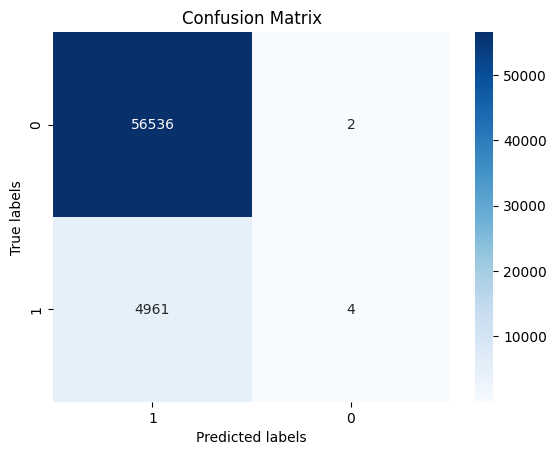

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True,cmap=plt.cm.Blues, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['0', '1']);

In [ ]:
#Sensitivity, Recall, Hit rate, or True Positive Rate (TPR)
Sensitivity = TP/(TP+FN)
Sensitivity

0.0008056394763343404

In [ ]:
#Specificity, Selectivity or True Negative Rate (TNR)
Specificity = TN/(TN+FP)
Specificity

0.9999646255615692

In [ ]:
#Precision or Positive Predictive Value (PPV)
Precision = TP/ (TP+FP)
Precision

0.6666666666666666

In [ ]:
#False Discovery Rate (FDR)
FDR = 1-Precision
FDR

0.33333333333333337

In [ ]:
#F1 score( harmonic mean of precision and sensitivity(recall)
F1= 2/ ((1/Precision) + (1/Sensitivity))
F1

0.0016093341380004024

In [ ]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, y_pred)

0.5003851325189517

In [ ]:
!pip install scikit-plot
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


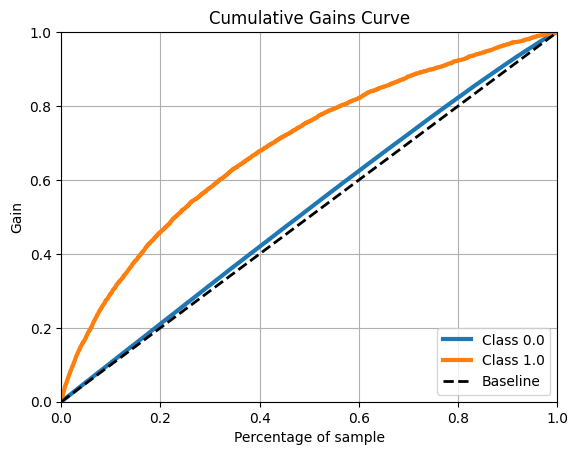

In [ ]:
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(target_test, predicted_probas)
plt.show()

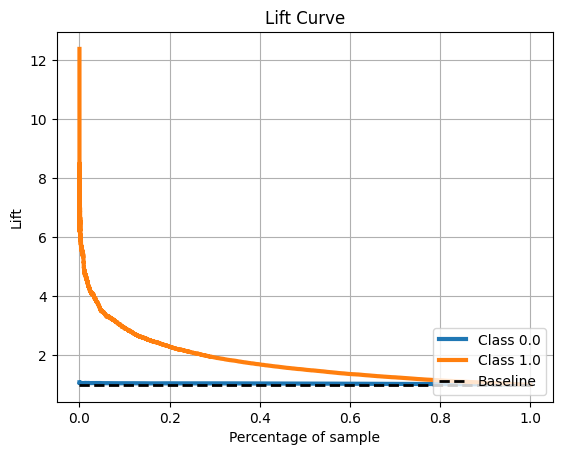

In [ ]:
skplt.metrics.plot_lift_curve(target_test, predicted_probas)
plt.show()

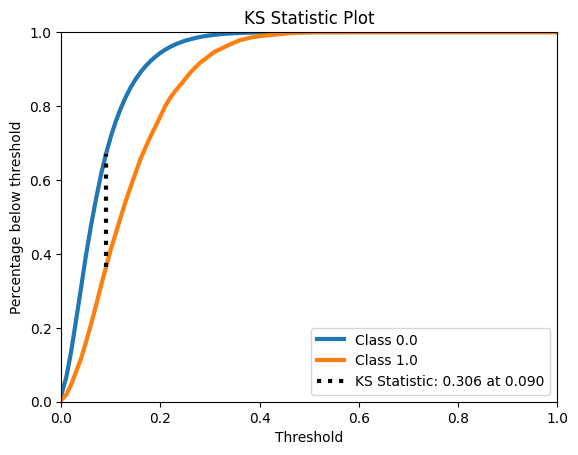

In [ ]:
skplt.metrics.plot_ks_statistic(target_test, predicted_probas)
plt.show()

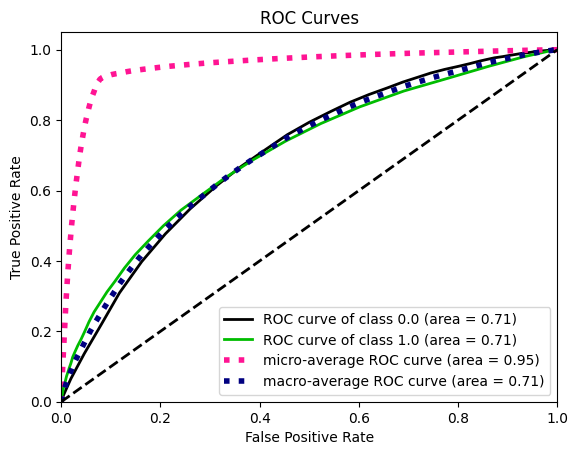

In [ ]:
skplt.metrics.plot_roc(target_test, predicted_probas)
plt.show()

In [ ]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

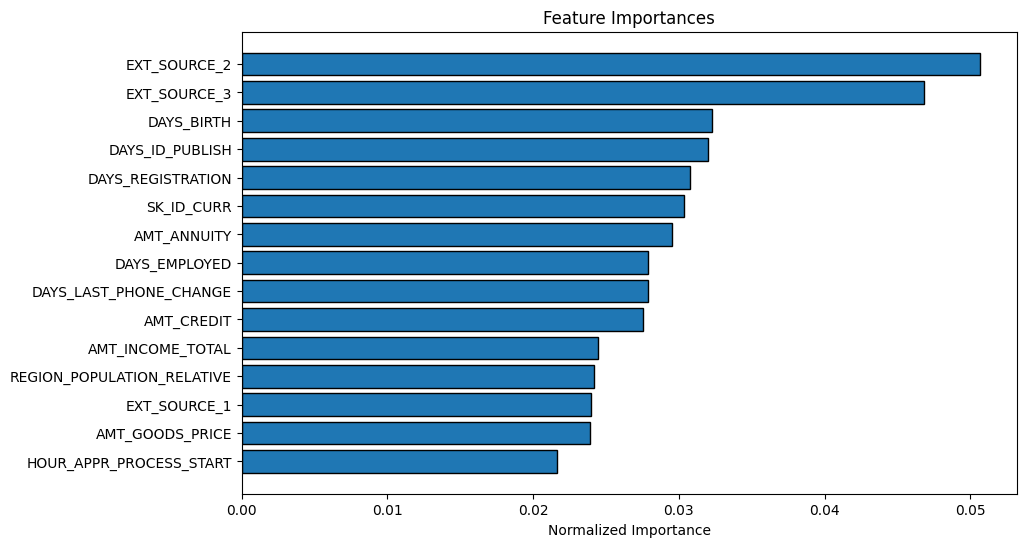

In [ ]:
feature_importances_sorted = plot_feature_importances(feature_importances)

TOP 10
EXT_SOURCE_2

EXT_SOURCE_3

DAYS_BIRTH

DAYS_ID_PUBLISH

DAYS_REGISTRATION

AMT_ANNUITY

DAYS_LAST_PHONE_CHANGE

DAYS_EMPLOYED

AMT_CREDIT

AMT_INCOME_TOTAL

In [ ]:
loan11=app_train[['SK_ID_CURR','TARGET','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','DAYS_ID_PUBLISH','DAYS_REGISTRATION','AMT_ANNUITY','DAYS_LAST_PHONE_CHANGE','DAYS_EMPLOYED','AMT_CREDIT','AMT_INCOME_TOTAL']]

In [ ]:
loan11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SK_ID_CURR              307511 non-null  float64
 1   TARGET                  307511 non-null  float64
 2   EXT_SOURCE_2            307511 non-null  float64
 3   EXT_SOURCE_3            307511 non-null  float64
 4   DAYS_BIRTH              307511 non-null  float64
 5   DAYS_ID_PUBLISH         307511 non-null  float64
 6   DAYS_REGISTRATION       307511 non-null  float64
 7   AMT_ANNUITY             307511 non-null  float64
 8   DAYS_LAST_PHONE_CHANGE  307511 non-null  float64
 9   DAYS_EMPLOYED           307511 non-null  float64
 10  AMT_CREDIT              307511 non-null  float64
 11  AMT_INCOME_TOTAL        307511 non-null  float64
dtypes: float64(12)
memory usage: 28.2 MB


In [ ]:
#@title Designating target and features

y = loan11.TARGET # Target variable
X = loan11.drop(columns=['TARGET']) # Features by dropping the target column

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SK_ID_CURR              307511 non-null  float64
 1   EXT_SOURCE_2            307511 non-null  float64
 2   EXT_SOURCE_3            307511 non-null  float64
 3   DAYS_BIRTH              307511 non-null  float64
 4   DAYS_ID_PUBLISH         307511 non-null  float64
 5   DAYS_REGISTRATION       307511 non-null  float64
 6   AMT_ANNUITY             307511 non-null  float64
 7   DAYS_LAST_PHONE_CHANGE  307511 non-null  float64
 8   DAYS_EMPLOYED           307511 non-null  float64
 9   AMT_CREDIT              307511 non-null  float64
 10  AMT_INCOME_TOTAL        307511 non-null  float64
dtypes: float64(11)
memory usage: 25.8 MB


Select a sample of 1000. Using the full population of the app_train dataset requires 300 GB RAM that I do not have 

In [ ]:
X2=X.sample(n=1000, random_state=1)

In [ ]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 64282 to 173682
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SK_ID_CURR              1000 non-null   float64
 1   EXT_SOURCE_2            1000 non-null   float64
 2   EXT_SOURCE_3            1000 non-null   float64
 3   DAYS_BIRTH              1000 non-null   float64
 4   DAYS_ID_PUBLISH         1000 non-null   float64
 5   DAYS_REGISTRATION       1000 non-null   float64
 6   AMT_ANNUITY             1000 non-null   float64
 7   DAYS_LAST_PHONE_CHANGE  1000 non-null   float64
 8   DAYS_EMPLOYED           1000 non-null   float64
 9   AMT_CREDIT              1000 non-null   float64
 10  AMT_INCOME_TOTAL        1000 non-null   float64
dtypes: float64(11)
memory usage: 93.8 KB


Rename dataframe to use my template

In [ ]:
X1=X2
X1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 64282 to 173682
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SK_ID_CURR              1000 non-null   float64
 1   EXT_SOURCE_2            1000 non-null   float64
 2   EXT_SOURCE_3            1000 non-null   float64
 3   DAYS_BIRTH              1000 non-null   float64
 4   DAYS_ID_PUBLISH         1000 non-null   float64
 5   DAYS_REGISTRATION       1000 non-null   float64
 6   AMT_ANNUITY             1000 non-null   float64
 7   DAYS_LAST_PHONE_CHANGE  1000 non-null   float64
 8   DAYS_EMPLOYED           1000 non-null   float64
 9   AMT_CREDIT              1000 non-null   float64
 10  AMT_INCOME_TOTAL        1000 non-null   float64
dtypes: float64(11)
memory usage: 93.8 KB


In [ ]:
#@title Standardizing the data

# Standardizing is needed as most clustering techniques depend on distance measures and hence differently scaled features can skew their importance
sc = StandardScaler() # Create scaler object
std_X1 = sc.fit_transform(X1) # Apply to data. Note: an array is returned
X1 = pd.DataFrame(data=std_X1, columns=X1.columns) # Convert array back to DataFrame

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(X1, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(X1))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.6865371087186941.
Cophenetic correlation for Euclidean distance and complete linkage is 0.49909201412410226.
Cophenetic correlation for Euclidean distance and average linkage is 0.7075675357628363.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.5276821763236862.
Cophenetic correlation for Chebyshev distance and single linkage is 0.5406063928293006.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.5482300091205646.
Cophenetic correlation for Chebyshev distance and average linkage is 0.6722688943348392.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.5991204512902901.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.6818566714971545.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.39767691348575135.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.6451849590789122.
Cophenetic 

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.7075675357628363, which is obtained with average linkage.


We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.

Let's see the dendrograms for the different linkage methods.

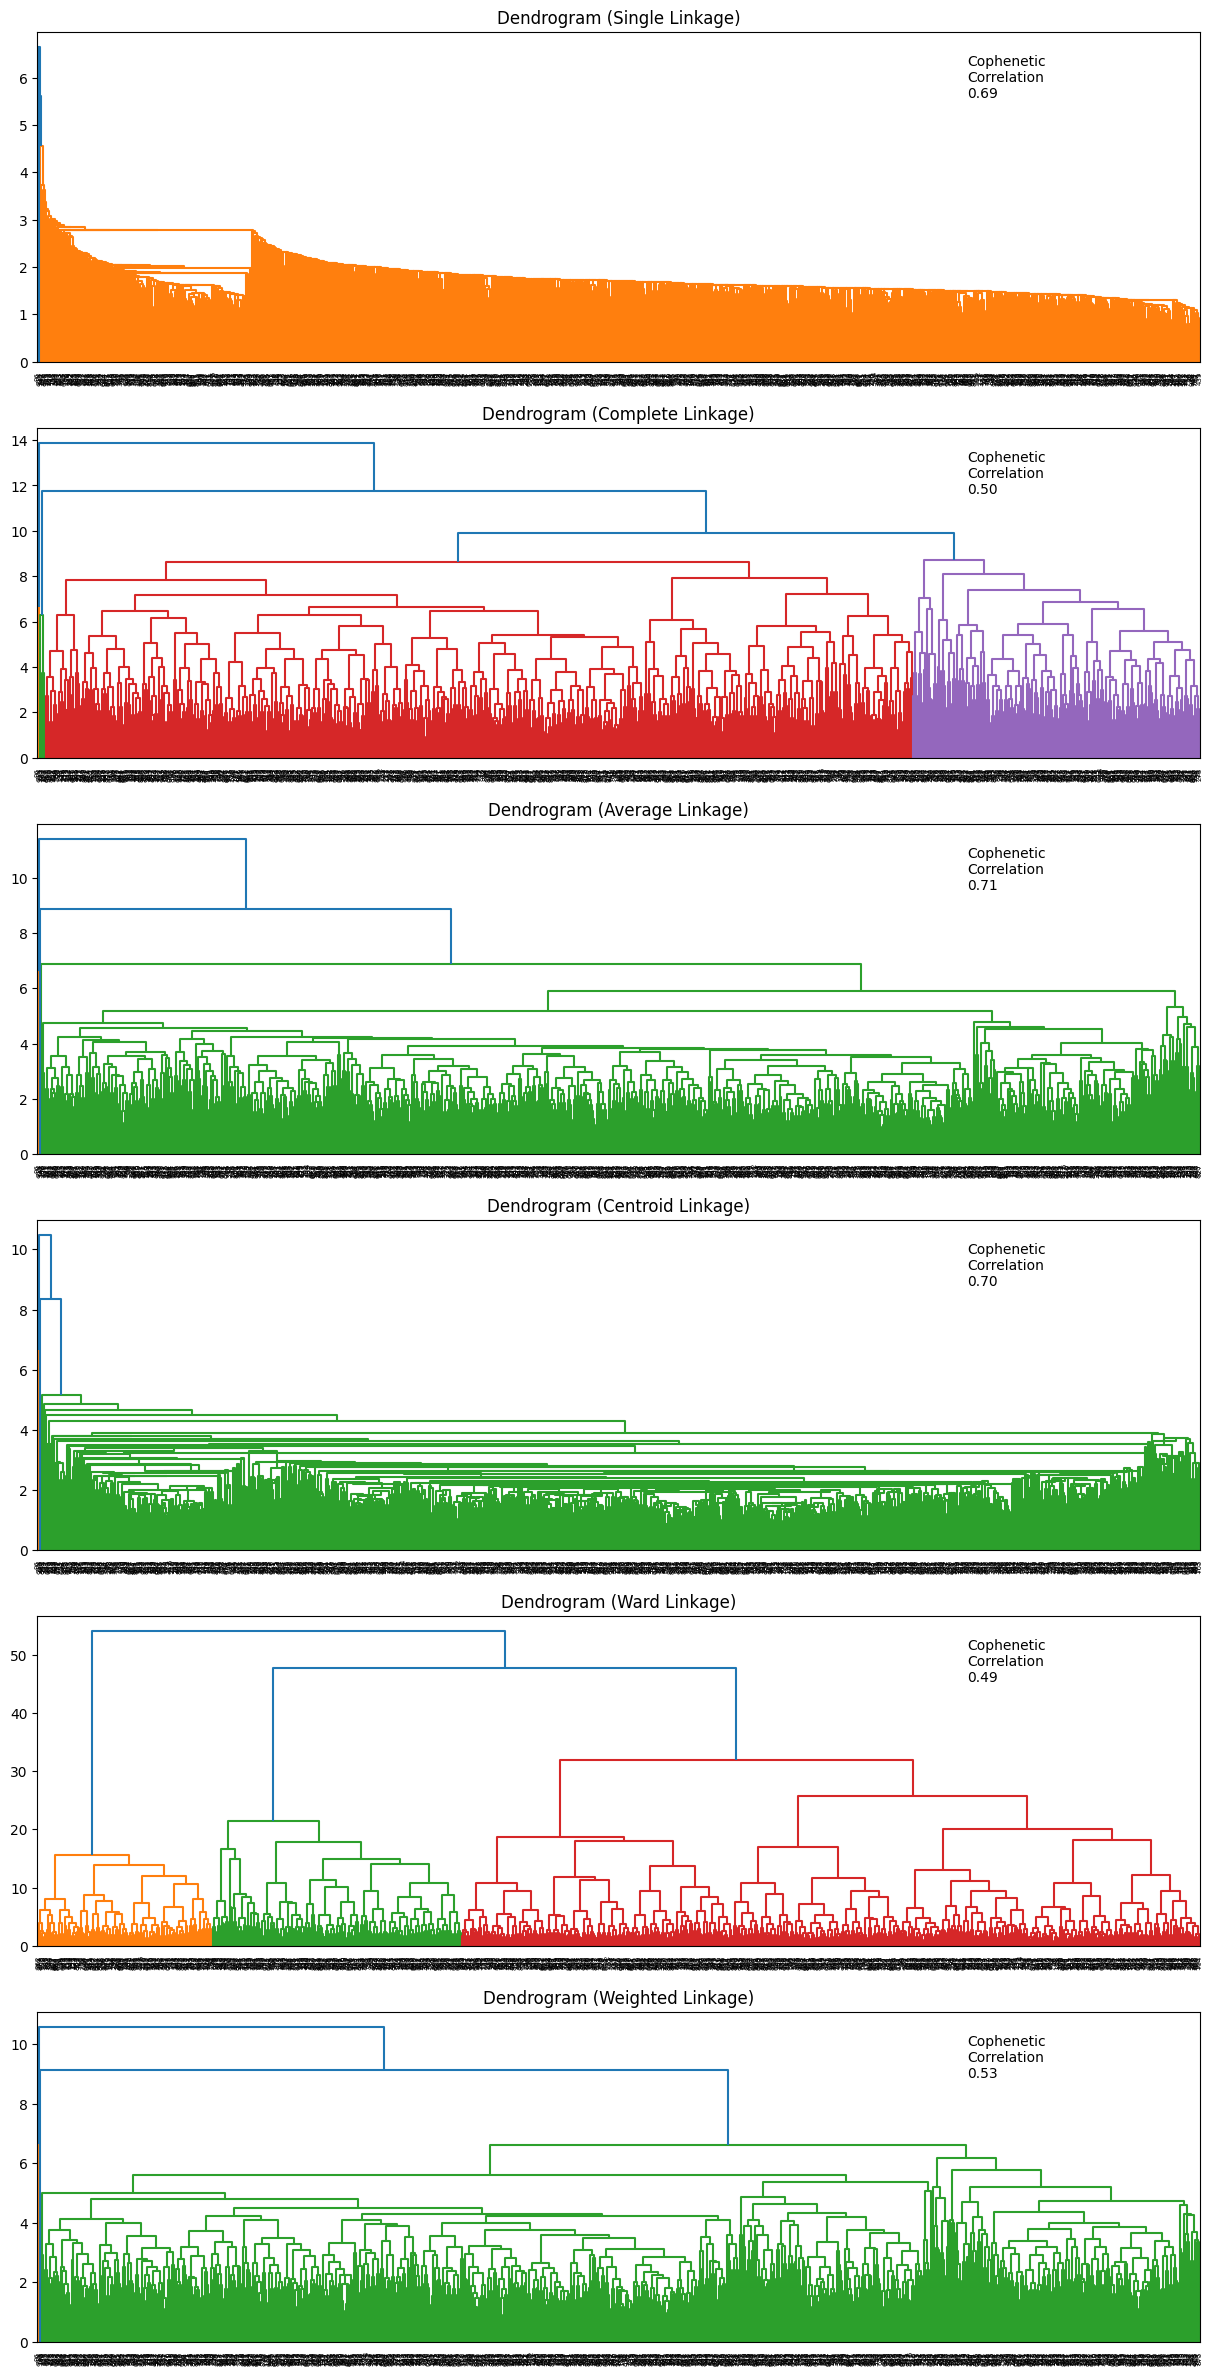

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(X1, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(X1))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

Observations

The optimal number of clusters from a dendrogram can be obtained by deciding where to cut the cluster tree. Generally, the cluster tree is cut where dendrogram height is maximum as it generally corresponds to distinct and homogeneous clusters.

Lets visualize the dendrogram cut for average link in the below plot

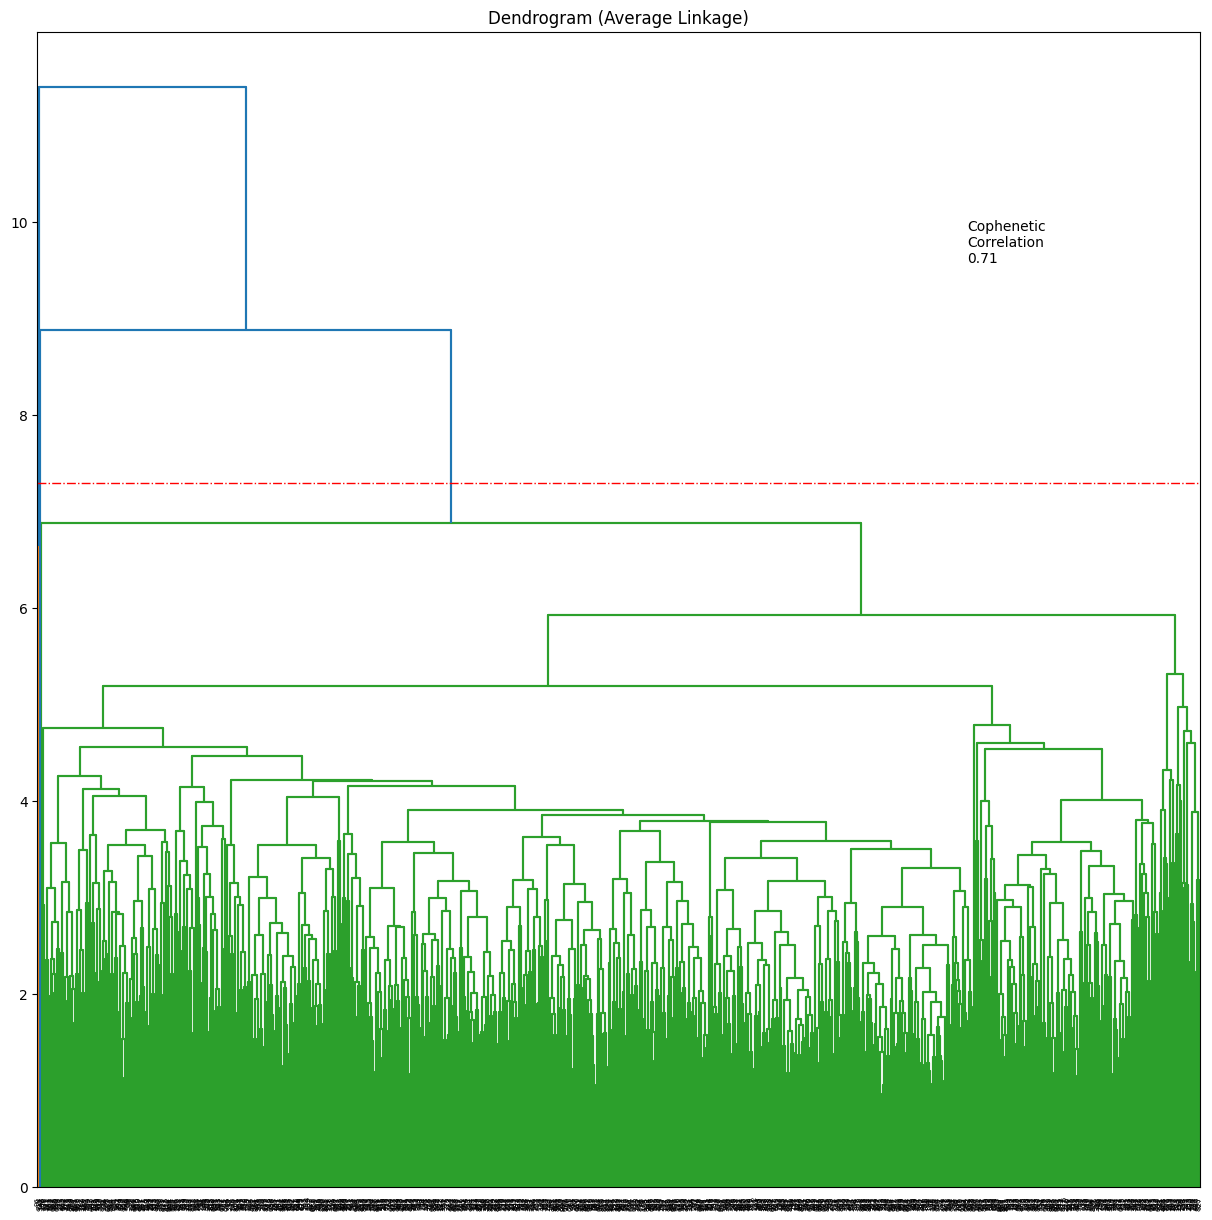

In [ ]:
# list of linkage methods
linkage_methods = ["average"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 15))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(X1, metric="euclidean", method=method)

    dendrogram(Z, ax=axs)
    axs.set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(X1))
    axs.annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
dendrogram(Z, color_threshold=7.3)
plt.axhline(y=7.3, c="red", lw=1, linestyle="dashdot")

Hierarchical Clustering

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="average")
HCmodel.fit(X1)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=6)

In [ ]:
X1["HC_Clusters"] = HCmodel.labels_
X2["HC_Clusters"] = HCmodel.labels_

In [ ]:
cluster_profile = X2.groupby("HC_Clusters").mean()

In [ ]:
cluster_profile["count_in_each_segments"] = (
    X2.groupby("HC_Clusters")["AMT_INCOME_TOTAL"].count().values
)

In [ ]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 64282 to 173682
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SK_ID_CURR              1000 non-null   float64
 1   EXT_SOURCE_2            1000 non-null   float64
 2   EXT_SOURCE_3            1000 non-null   float64
 3   DAYS_BIRTH              1000 non-null   float64
 4   DAYS_ID_PUBLISH         1000 non-null   float64
 5   DAYS_REGISTRATION       1000 non-null   float64
 6   AMT_ANNUITY             1000 non-null   float64
 7   DAYS_LAST_PHONE_CHANGE  1000 non-null   float64
 8   DAYS_EMPLOYED           1000 non-null   float64
 9   AMT_CREDIT              1000 non-null   float64
 10  AMT_INCOME_TOTAL        1000 non-null   float64
 11  HC_Clusters             1000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 101.6 KB


In [ ]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SK_ID_CURR              1000 non-null   float64
 1   EXT_SOURCE_2            1000 non-null   float64
 2   EXT_SOURCE_3            1000 non-null   float64
 3   DAYS_BIRTH              1000 non-null   float64
 4   DAYS_ID_PUBLISH         1000 non-null   float64
 5   DAYS_REGISTRATION       1000 non-null   float64
 6   AMT_ANNUITY             1000 non-null   float64
 7   DAYS_LAST_PHONE_CHANGE  1000 non-null   float64
 8   DAYS_EMPLOYED           1000 non-null   float64
 9   AMT_CREDIT              1000 non-null   float64
 10  AMT_INCOME_TOTAL        1000 non-null   float64
 11  HC_Clusters             1000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 93.9 KB


In [ ]:
# let's see the SK_ID_CURR's in each cluster
for cl in X2["HC_Clusters"].unique():
    print("In cluster {}, the following SK_ID_CURR are present:".format(cl))
    print(X2[X2["HC_Clusters"] == cl]["SK_ID_CURR"].unique())
    print()

In cluster 2, the following SK_ID_CURR are present:
[174545. 209898. 454938. 398930. 201672. 132243. 429350. 410203. 376596.
 446827. 318422. 392459. 388112. 440863. 206050. 354672. 182098. 101999.
 327012. 266409. 168070. 217897. 288017. 258382. 167350. 262671. 444293.
 193746. 113644. 402569. 450576. 160318. 107858. 436386. 417147. 246735.
 158157. 296661. 402167. 363002. 358589. 305652. 139314. 237775. 237625.
 120469. 312385. 239124. 320599. 278452. 395433. 213268. 248982. 330419.
 119459. 434374. 451706. 122754. 288074. 229994. 231356. 287591. 350130.
 456081. 220202. 382243. 119874. 393491. 409378. 140457. 160397. 431707.
 450534. 387840. 134900. 450165. 181358. 120889. 200139. 257881. 102776.
 333144. 111161. 445689. 162174. 273150. 192813. 193694. 213999. 316508.
 232565. 229740. 403742. 406106. 384075. 299350. 258937. 264653. 248059.
 386168. 446244. 336164. 121683. 293208. 155566. 288325. 289484. 104228.
 288437. 369382. 277314. 434403. 180824. 110118. 259675. 434611. 308908.

In [ ]:
# selecting numerical columns
num_cols = X1.select_dtypes(include=np.number).columns.tolist()

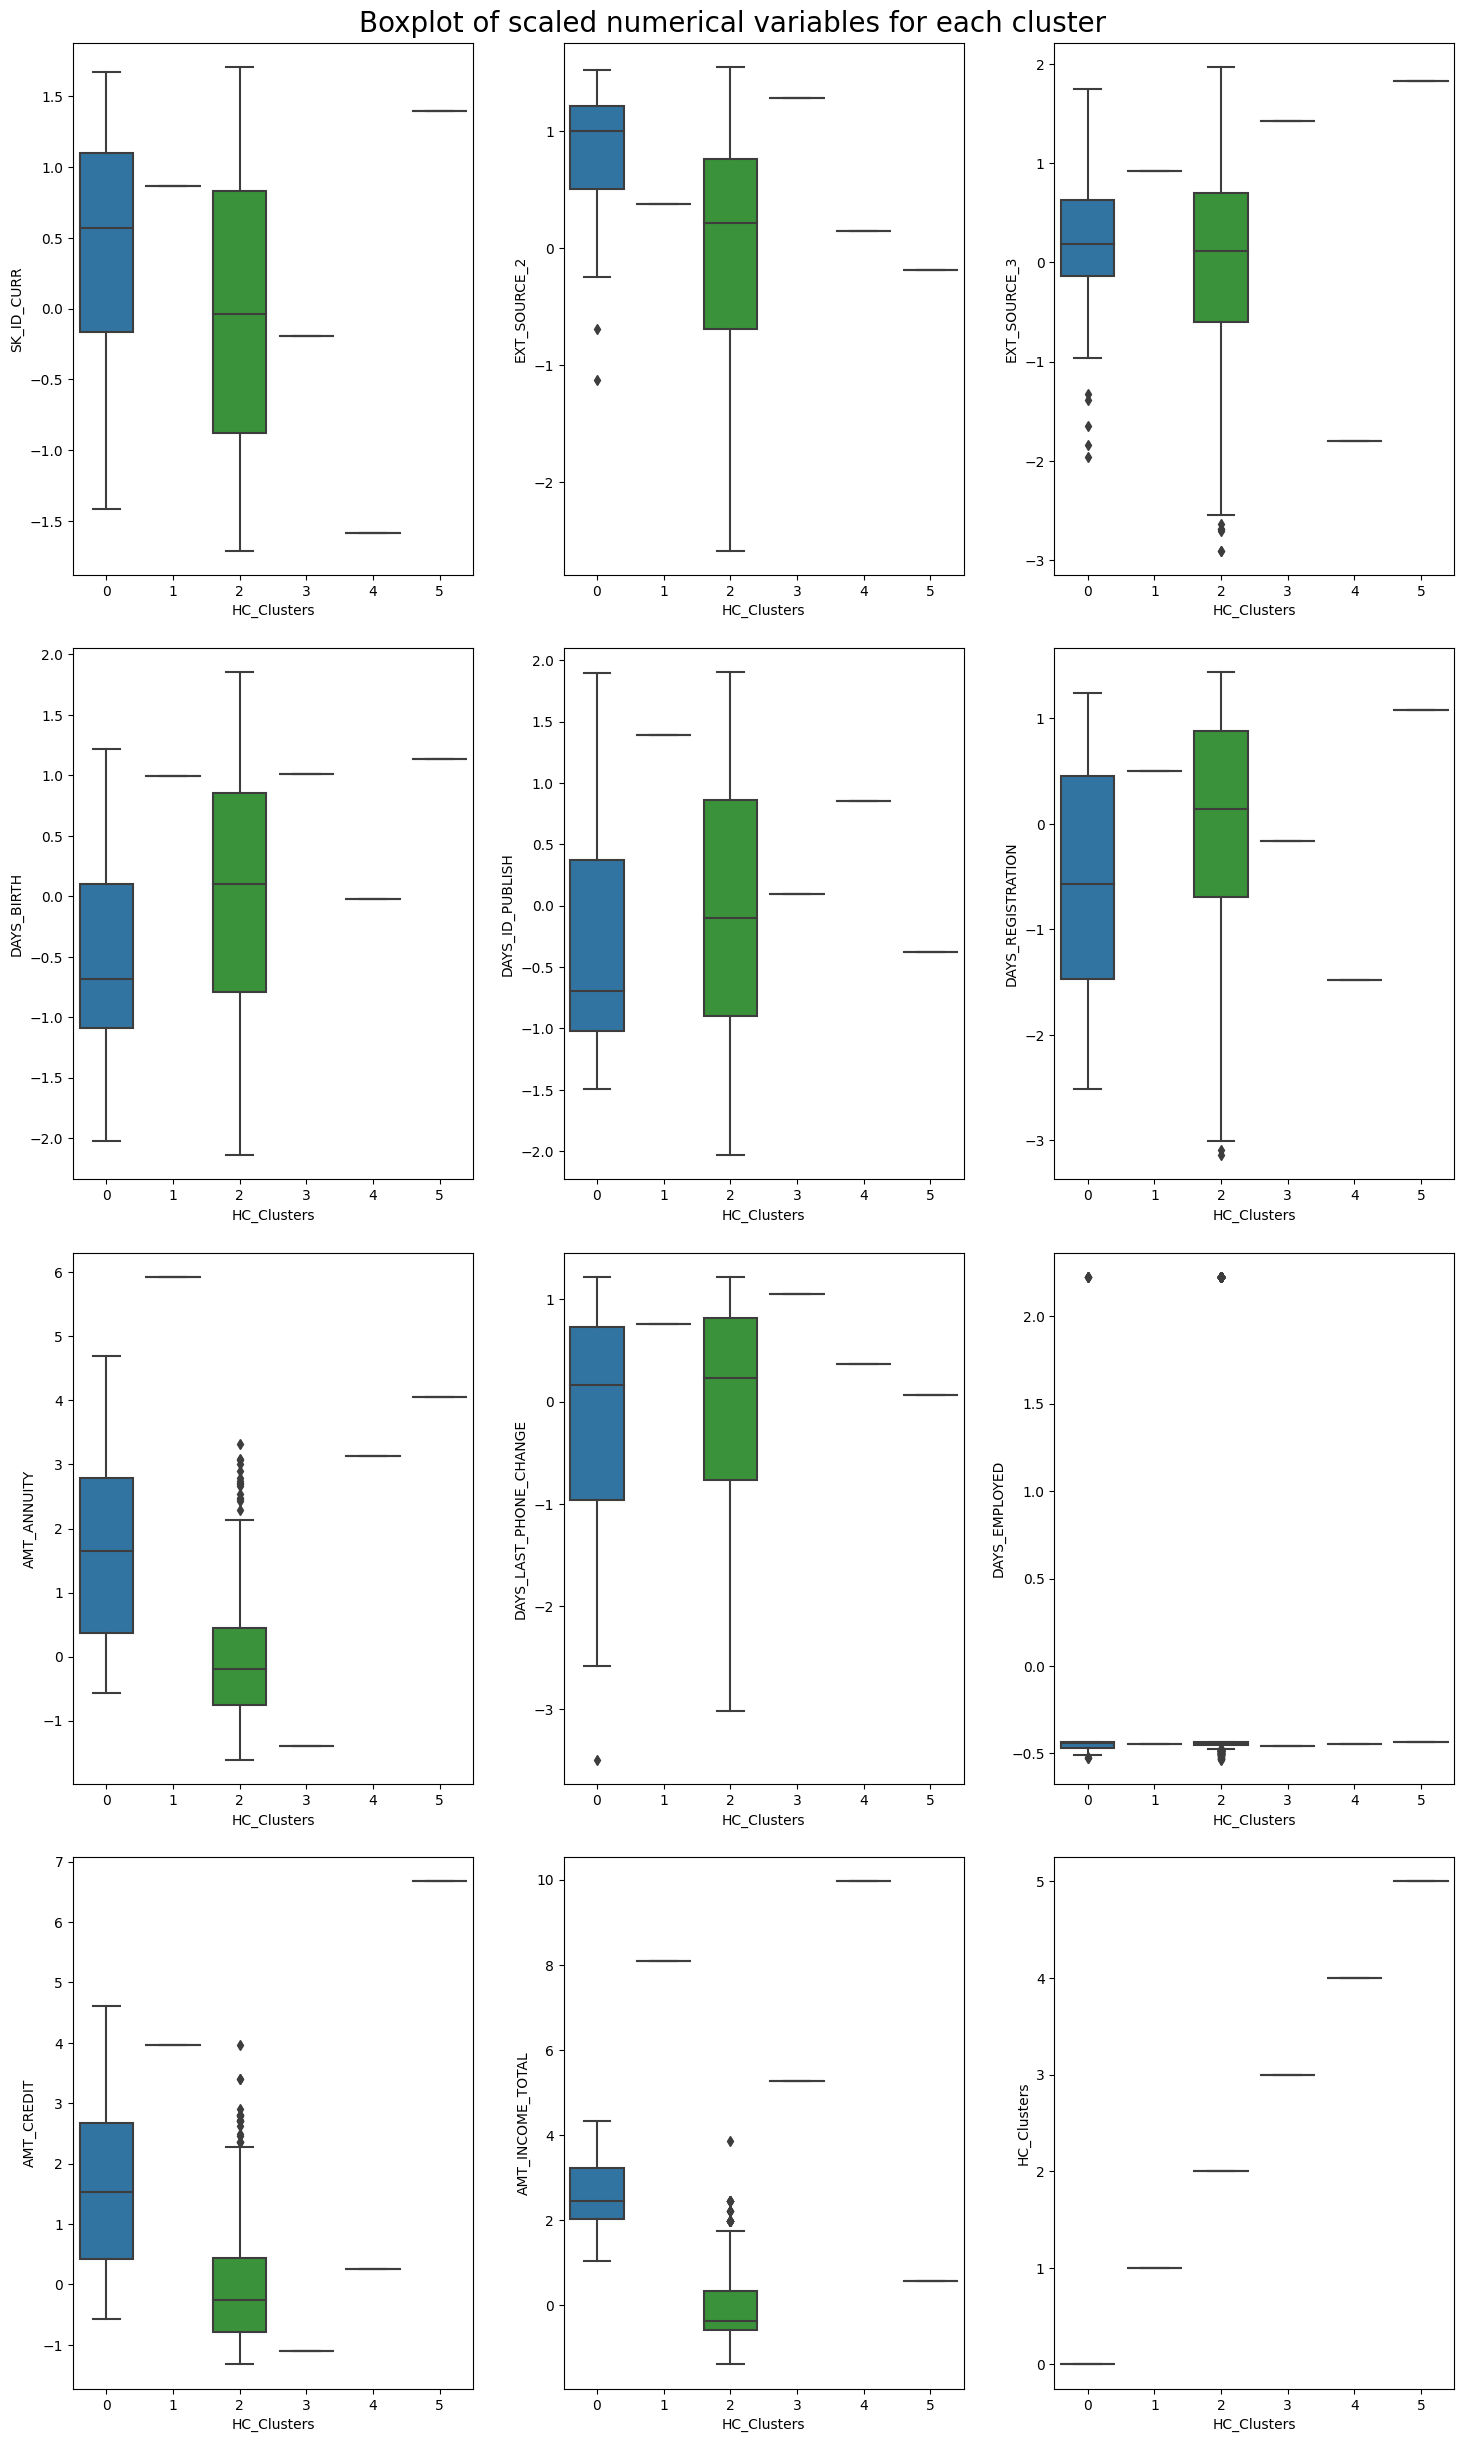

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(15, 25))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(4):
    sns.boxplot(
        ax=axes[ii][0],
        y=X1[num_cols[counter]],
        x=X1["HC_Clusters"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][1],
        y=X1[num_cols[counter]],
        x=X1["HC_Clusters"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][2],
        y=X1[num_cols[counter]],
        x=X1["HC_Clusters"],
    )
    counter = counter + 1


fig.tight_layout(pad=2.0)